In [15]:
PATCH_LEN = 8
MAX_PATCHES = 250
PCA_COMPONENTS = 30

In [16]:
from sklearn.decomposition import PCA

In [17]:
path="./input/BSR/BSDS500/data/images/train/"

In [18]:
import cv2
import glob
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d

In [19]:
def load_overlapping_patches(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image_patches = extract_patches_2d(image=image, patch_size=(PATCH_LEN, PATCH_LEN), max_patches=MAX_PATCHES)
    image_patches = image_patches.reshape(-1, PATCH_LEN * PATCH_LEN)

    return image_patches

In [20]:
images_path_list = glob.glob(f"{path}/*.jpg")

image_patches = []

for image_path in images_path_list:
    patches = load_overlapping_patches(image_path)
    image_patches.append(patches)

image_patches = np.vstack(image_patches)

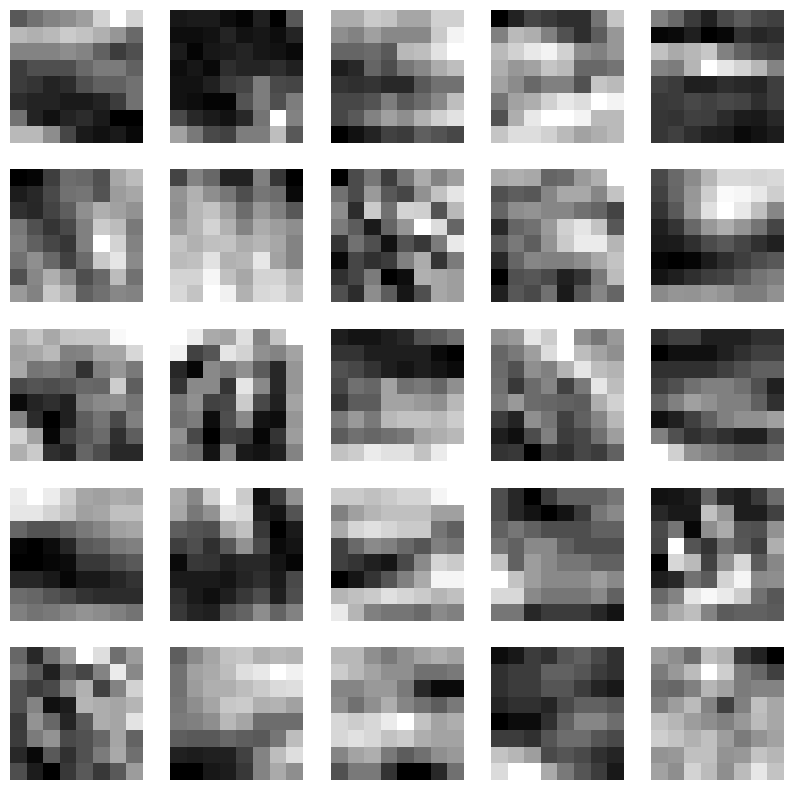

In [21]:
import matplotlib.pyplot as plt

#display the image patches
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_patches[i].reshape(PATCH_LEN, PATCH_LEN), cmap="gray")
    plt.axis("off")
plt.show()


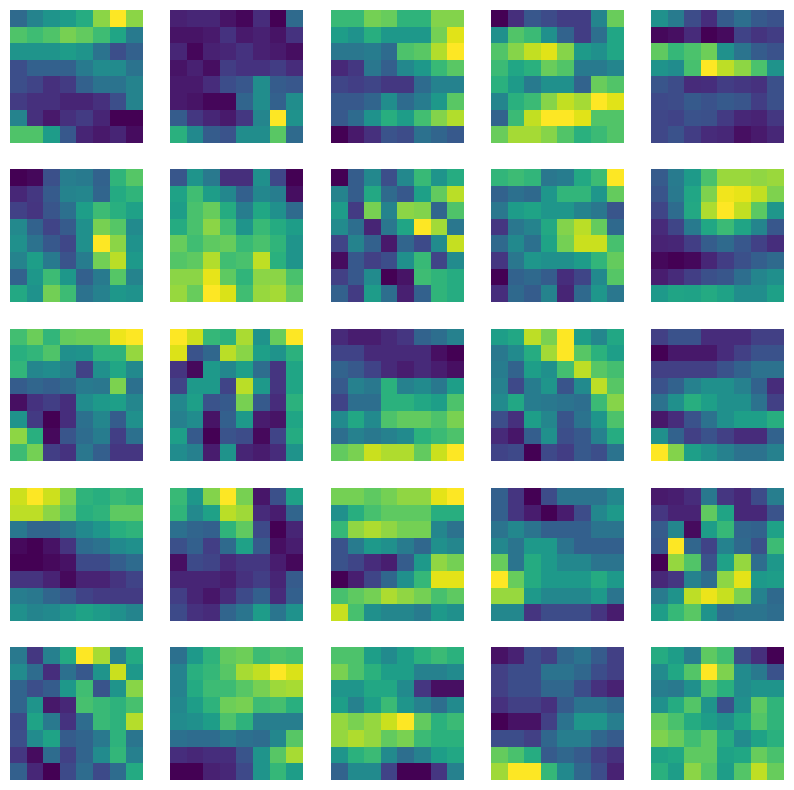

In [22]:
#display the image patches not in grayscale
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_patches[i].reshape(PATCH_LEN, PATCH_LEN))
    plt.axis("off")
plt.show()


In [23]:
#show the shape of the image patches
print(image_patches.shape)


(50000, 64)


In [24]:
image_pca = PCA(n_components=PCA_COMPONENTS)

In [25]:
#show the type of image pca
print(type(image_pca))
image_pca.fit(image_patches)

<class 'sklearn.decomposition._pca.PCA'>


PCA(n_components=30)

In [26]:
image_pca.components_.shape

(30, 64)

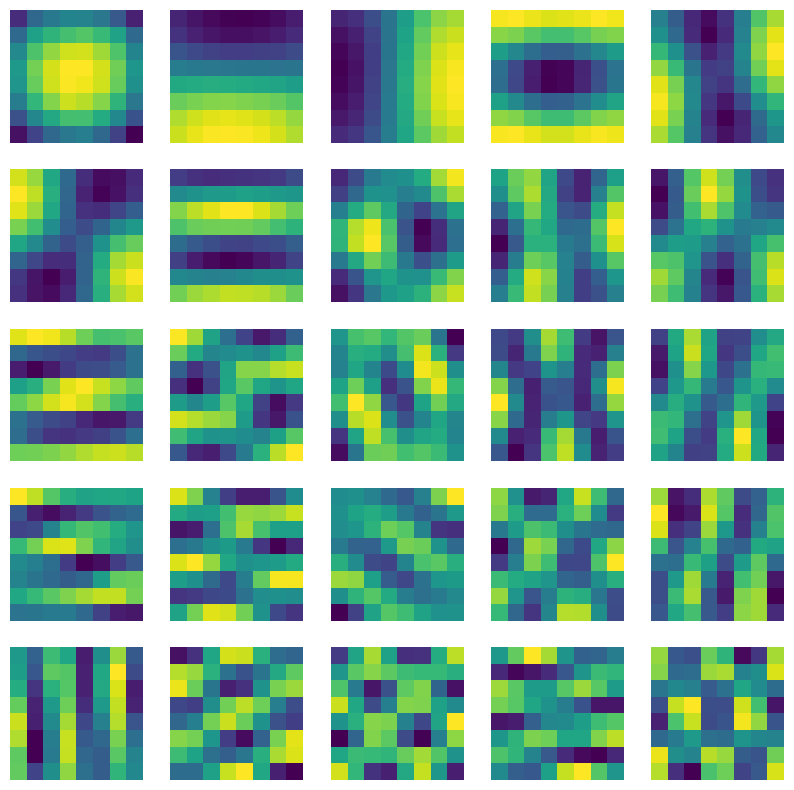

In [27]:
#display the image pca components
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_pca.components_[i].reshape(PATCH_LEN, PATCH_LEN), )
    plt.axis("off")
plt.show()


In [28]:

pca_weights = []

for ind, pca_component in enumerate(image_pca.components_, 1):
    image = pca_component.reshape(PATCH_LEN, PATCH_LEN)
    pca_weights.append(image)

In [89]:
#shape of pca weights
print(len(pca_weights))

30


In [29]:
import matplotlib.pyplot as plt

In [30]:

def plot_image_grid(images, num_images_per_row=5):
  
    component = 0
    num_rows = len(images) // num_images_per_row
    f, ax = plt.subplots(num_rows, num_images_per_row)

    for i in range(num_rows):
        for j in range(num_images_per_row):
            component += 1
            ax[i, j].imshow(images[i * num_images_per_row + j])
            ax[i, j].set_title(component)
            ax[i, j].axis("off")

        f.set_figheight(20)
        f.set_figwidth(20)

    plt.savefig(f"./results/natural_image_pca/{MAX_PATCHES}.png")
    plt.show()


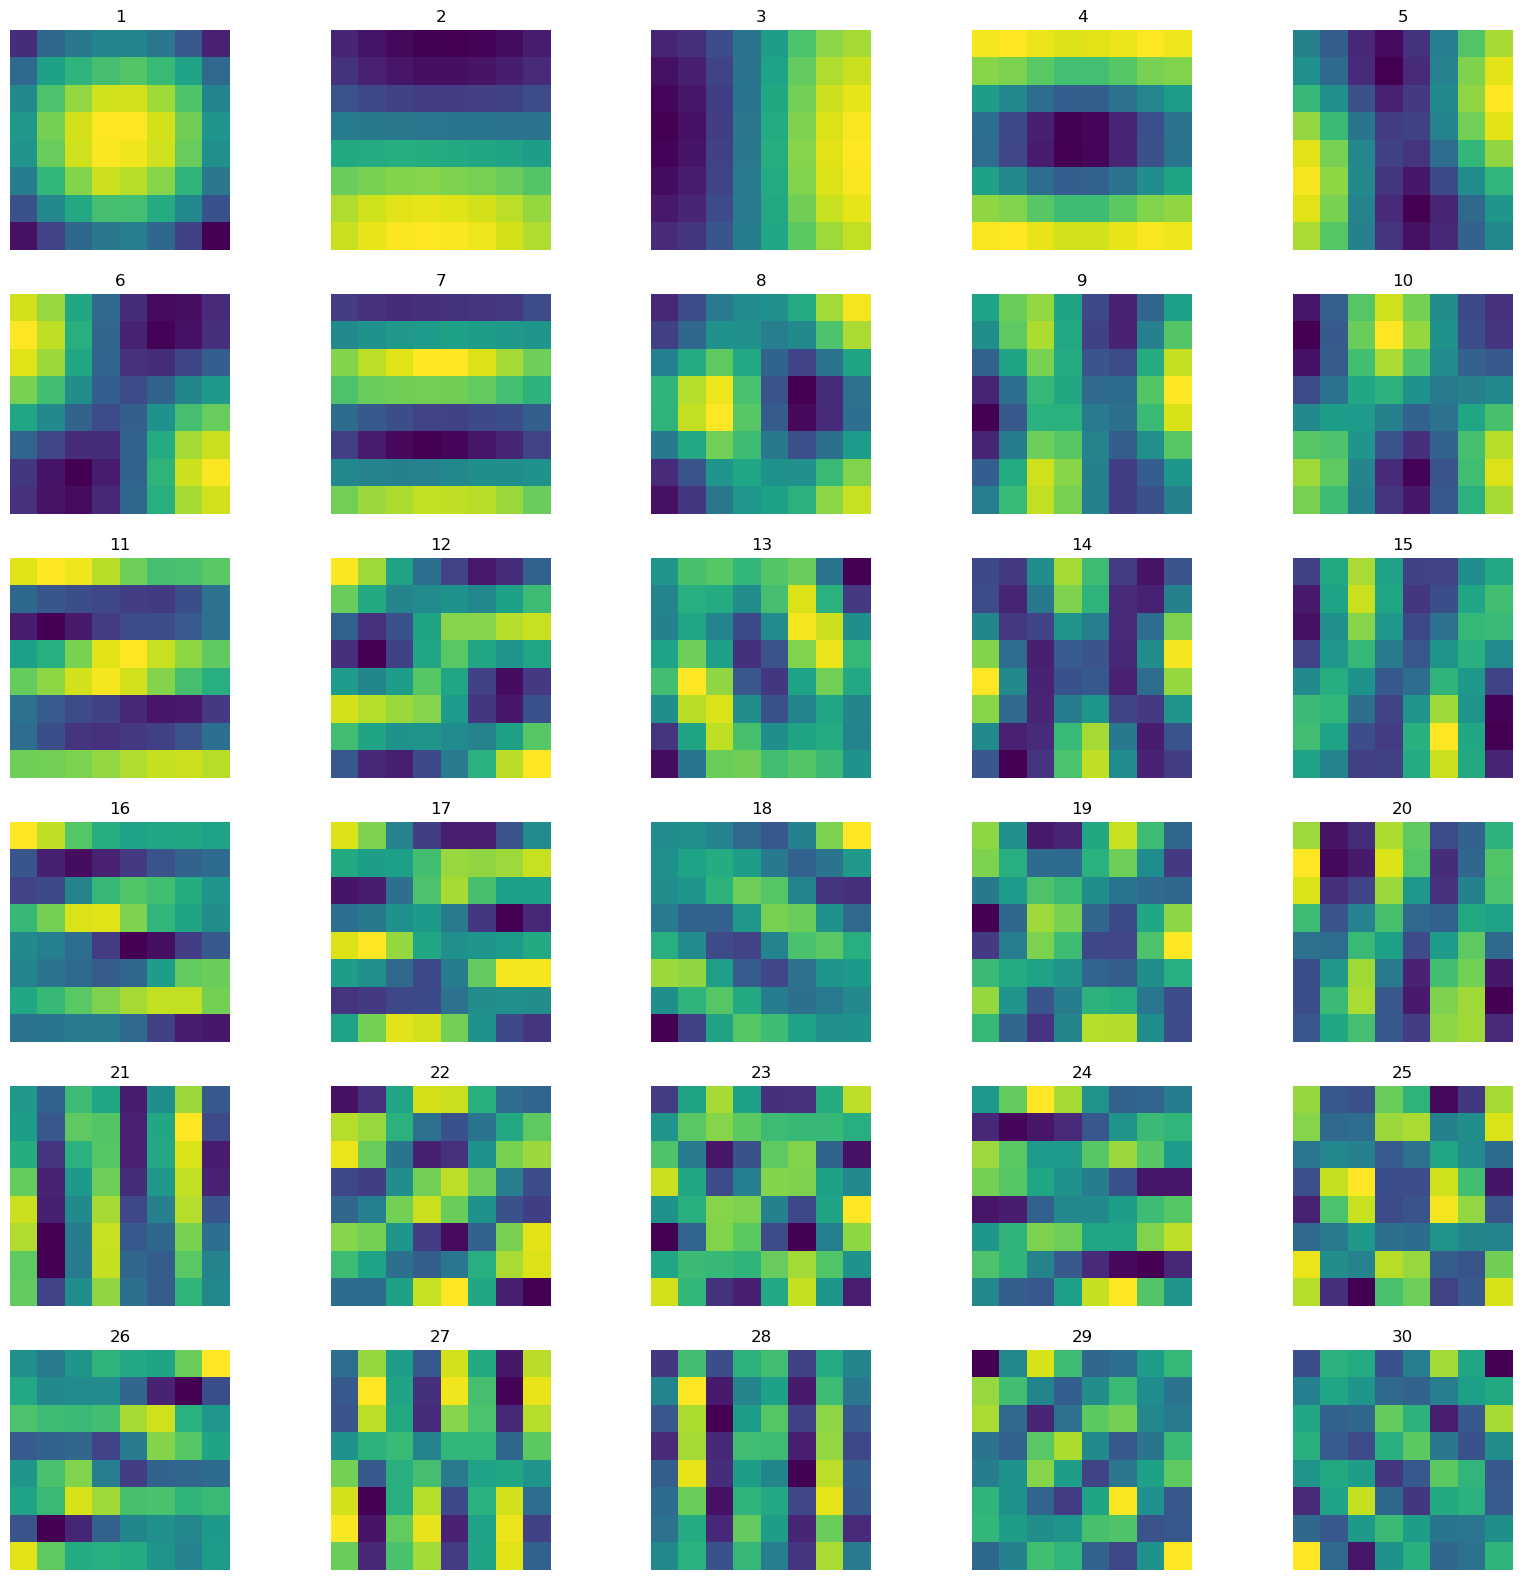

In [31]:
plot_image_grid(pca_weights)

In [32]:
#print the shape of the pca weights
print(len(pca_weights))


30


In [35]:
#print the vectors after pca
print(pca_weights)



[array([[0.12167316, 0.12318094, 0.12365819, 0.12402   , 0.1239858 ,
        0.12361838, 0.12277593, 0.12140075],
       [0.12322849, 0.12489091, 0.12545153, 0.12584398, 0.1260321 ,
        0.12563927, 0.12491293, 0.12321066],
       [0.12415144, 0.12594619, 0.12680854, 0.12745253, 0.12747881,
        0.12693369, 0.12599006, 0.1239947 ],
       [0.12462583, 0.12646468, 0.12752029, 0.12797088, 0.12797719,
        0.12751652, 0.12641433, 0.12455112],
       [0.12450997, 0.12629529, 0.12746039, 0.1279422 , 0.12782378,
        0.12744931, 0.12628329, 0.12438213],
       [0.12382169, 0.12552802, 0.12663945, 0.12741621, 0.12720496,
        0.1266754 , 0.12544521, 0.1236243 ],
       [0.12254739, 0.12409088, 0.1251037 , 0.12583375, 0.12581527,
        0.12518849, 0.12412291, 0.12257795],
       [0.1210605 , 0.1221899 , 0.12317597, 0.1236444 , 0.12384565,
        0.12318827, 0.12212646, 0.1207414 ]]), array([[-0.14095906, -0.15812135, -0.16929263, -0.17630533, -0.17844889,
        -0.17447027,

In [38]:
pca_weights = np.array(pca_weights)
pca_weights.shape

(30, 8, 8)

In [39]:
#reshape the pca weights to be 2d
pca_weights = pca_weights.reshape(30, 64)
pca_weights.shape

(30, 64)

In [40]:
#find the variance of each column in the pca weights
variance = np.var(pca_weights, axis=0)
#display the variance
print(variance)

[0.02324892 0.01488355 0.01642989 0.01572808 0.01545411 0.01614898
 0.01545632 0.02232632 0.01613055 0.0149486  0.01327942 0.01399382
 0.01331611 0.0130505  0.01410573 0.01519123 0.01755878 0.01329874
 0.01431614 0.01479423 0.01413463 0.0151074  0.01368968 0.01716699
 0.01674731 0.01424134 0.01463978 0.01385034 0.01360657 0.01454713
 0.01342762 0.01618086 0.016176   0.01406873 0.01348805 0.01330431
 0.00982436 0.01412498 0.0125964  0.01594463 0.01745757 0.01384622
 0.01522402 0.01443048 0.01061959 0.01508395 0.01236127 0.01604403
 0.01574216 0.01418483 0.01355036 0.01391049 0.01378094 0.01374303
 0.01323963 0.0168007  0.02258142 0.01510125 0.01751248 0.01386478
 0.01464817 0.01561771 0.01452558 0.02226885]


In [41]:
#find the index of the maximum variance
max_variance_index = np.argmax(variance)
#display the index of the maximum variance
print(max_variance_index)

0


In [42]:
#find the index of the first 4 maximum variance
max_variance_index = np.argsort(variance)[-4:]
#display the index of the first 4 maximum variance
print(max_variance_index)

[63  7 56  0]


In [45]:
#find the variance of pca features along pca components
variance = np.var(pca_weights, axis=1)
#display the variance of pca features along pca components
print(variance)

[3.61568881e-06 1.56249649e-02 1.56249997e-02 1.56222985e-02
 1.56245431e-02 1.56248730e-02 1.56249997e-02 1.56249982e-02
 1.56249997e-02 1.56249973e-02 1.56248709e-02 1.56249980e-02
 1.56249210e-02 1.56249928e-02 1.56249730e-02 1.56249996e-02
 1.56249996e-02 1.56250000e-02 1.56249998e-02 1.56249997e-02
 1.56249998e-02 1.56249968e-02 1.56249977e-02 1.56249979e-02
 1.56249989e-02 1.56249879e-02 1.56249996e-02 1.56249878e-02
 1.56249997e-02 1.56250000e-02]


In [50]:
#find the variance of image patches along pca components
variance = np.var(image_patches, axis=0)
#display the variance of image patches along pca components
variance


array([3447.124648  , 3443.940159  , 3424.70318684, 3422.0515561 ,
       3410.05894322, 3419.26170714, 3429.35460152, 3433.03280371,
       3433.45528029, 3429.46709784, 3412.90312951, 3408.23944424,
       3410.14937911, 3416.56450681, 3429.64744444, 3431.66191451,
       3433.61078547, 3422.31326557, 3411.91085359, 3416.45557592,
       3417.17574691, 3414.54887972, 3427.02553902, 3417.04133406,
       3425.45387806, 3421.40328785, 3417.15520222, 3402.86479959,
       3409.94898576, 3415.63522639, 3413.24081621, 3411.60480857,
       3421.9169756 , 3421.91381848, 3416.14435999, 3408.47469011,
       3404.12970188, 3414.12604889, 3411.49293744, 3400.03686765,
       3417.89760924, 3409.20928509, 3405.44818937, 3417.56825464,
       3402.21443132, 3407.98041433, 3407.55082401, 3398.21047705,
       3417.10188632, 3406.15396319, 3404.64632349, 3409.34832275,
       3402.04208086, 3398.89277321, 3401.64351422, 3408.23747599,
       3420.57089729, 3408.87507544, 3411.76319118, 3406.48811

In [56]:
#find the first 2 index of the maximum variance
max_variance_index = np.argsort(variance)[-2:]
#display the first 2 index of the maximum variance
print(max_variance_index)

[1 0]


In [57]:
#find the mutual information between the first 2 components of the pca weights
from sklearn.metrics import mutual_info_score
mutual_info_score(pca_weights[0], pca_weights[1])


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


4.1588830833596715

In [67]:
data = image_patches
#reshape the image_patches.shape[1] to 8*8
data = data.reshape(-1, PATCH_LEN, PATCH_LEN)

loc1 = (3, 2)
loc2 = (3, 4)
x= np.zeros(data.shape[0])
y = np.zeros(data.shape[0])
for i in range(len(data)):
    x[i] = data[i][loc1]
    y[i] = data[i][loc2]

In [68]:
#divide the x,y into histogram of numpy and assign to hist_x_y
hist_x_y = np.histogram2d(x, y, bins=10, range=[[0, 255], [0, 255]])[0]

#find the mutual information of hist_x_y 
from sklearn.metrics import mutual_info_score
part_a = mutual_info_score(None, None, contingency=hist_x_y)


In [70]:
part_a

1.024247544509225

In [74]:
pca_data_reduced = image_pca.transform(image_patches)

In [90]:
pca_data_reduced.shape

(50000, 30)

In [84]:
#find the variance of each column in the pca data reduced along the axis pca_weights
variance = np.var(pca_data_reduced, axis=0)
#display the index of the first three max value of variance
print(np.argsort(variance)[-3:])



[2 1 0]


In [75]:
#take the first column of the pca_data_reduced to variable first_column
first_column = pca_data_reduced[:, 0]
#take the second column of the pca_data_reduced to variable second_column
second_column = pca_data_reduced[:, 1]


In [87]:
#calculate the mutual information between the first and second column
from sklearn.metrics import mutual_info_score
#create the histogram of the first and second column and store it in hist_first_second
hist_first_second = np.histogram2d(first_column, second_column, bins=10,)[0]
#calculate the mutual information between the first and second column
part_b = mutual_info_score(None, None, contingency=hist_first_second)
#print the mutual information between the first and second column
print(part_b)

0.020151353237212788


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


10.793505226683324